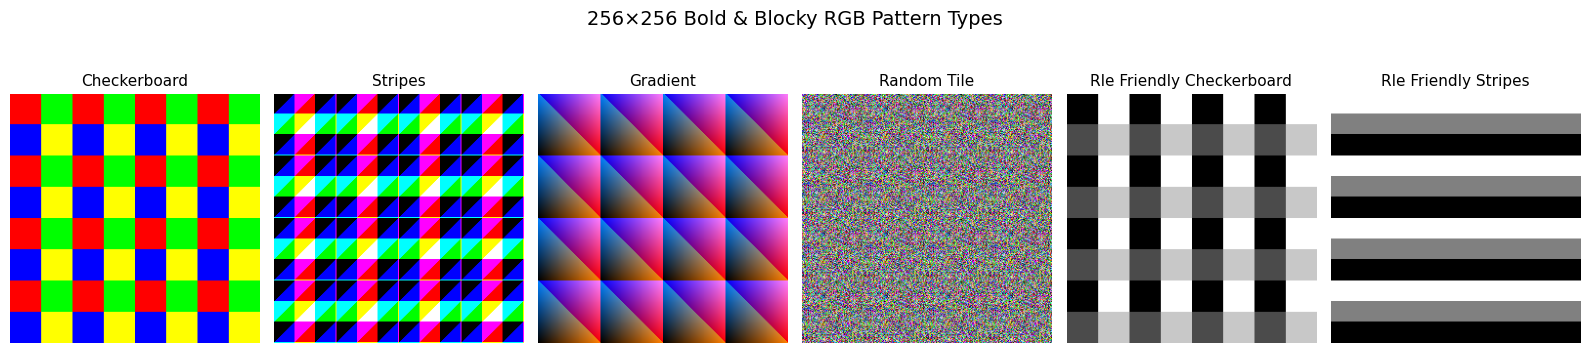

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def generate_rgb_pattern(tile_size=64, pattern_type='checkerboard', repeats=(4, 4)):
    """
    Generate colorful repeating RGB pattern images (default 256x256).
    Each pattern is visually distinct and easily perceivable.
    """
    if pattern_type == 'checkerboard':
        # Create an empty tile to fill
        tile = np.zeros((tile_size, tile_size, 3), dtype=np.uint8)

        # Find the halfway points for splitting
        h_split = tile_size // 2
        w_split = tile_size // 2

        # Assign a different solid color to each of the four quadrants
        # This creates large "blocks" of color.

        # Top-left quadrant: Red
        tile[0:h_split, 0:w_split] = [255, 0, 0]

        # Top-right quadrant: Green
        tile[0:h_split, w_split:] = [0, 255, 0]

        # Bottom-left quadrant: Blue
        tile[h_split:, 0:w_split] = [0, 0, 255]

        # Bottom-right quadrant: Yellow (or any other color)
        tile[h_split:, w_split:] = [255, 255, 0]

    elif pattern_type == 'stripes':
        # Stripes of distinct RGB colors
        x = np.arange(tile_size)
        y = np.arange(tile_size)
        xv, yv = np.meshgrid(x, y)
        r = ((xv // (tile_size // 3)) % 2) * 255
        g = ((yv // (tile_size // 3)) % 2) * 255
        b = (((xv + yv) // (tile_size // 3)) % 2) * 255
        tile = np.stack([r, g, b], axis=-1).astype(np.uint8)

    elif pattern_type == 'gradient':
        # Gradient bars of different colors
        x = np.linspace(0, 255, tile_size, dtype=np.uint8)
        y = np.linspace(255, 0, tile_size, dtype=np.uint8)
        xv, yv = np.meshgrid(x, y)
        r = xv
        g = (xv + yv) / 2
        b = yv
        tile = np.stack([r, g, b], axis=-1).astype(np.uint8)

    elif pattern_type == 'random_tile':
        np.random.seed(42)
        tile = np.random.randint(0, 256, (tile_size, tile_size, 3), dtype=np.uint8)

    elif pattern_type == 'rle_friendly_checkerboard':
        # This pattern is DESIGNED to be highly compressible by RLE.
        # It uses large blocks of colors where R, G, and B values are identical.
        # This creates long, uninterrupted runs of the *same byte value*
        # when the image is flattened, which is the perfect scenario for RLE.

        tile = np.zeros((tile_size, tile_size, 3), dtype=np.uint8)

        h_split = tile_size // 2
        w_split = tile_size // 2

        # Top-left quadrant: Black
        # Byte stream becomes: 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
        tile[0:h_split, 0:w_split] = [0, 0, 0]

        # Top-right quadrant: White
        # Byte stream becomes: 255, 255, 255, 255, 255, 255, ...
        tile[0:h_split, w_split:] = [255, 255, 255]

        # Bottom-left quadrant: Dark Gray
        # Byte stream becomes: 75, 75, 75, 75, 75, 75, ...
        tile[h_split:, 0:w_split] = [75, 75, 75]

        # Bottom-right quadrant: Light Gray
        # Byte stream becomes: 200, 200, 200, 200, 200, 200, ...
        tile[h_split:, w_split:] = [200, 200, 200]
    
    elif pattern_type == 'rle_friendly_stripes':
        # This pattern creates horizontal stripes of monochrome colors (R=G=B).
        # This is highly compressible by RLE because the byte stream
        # for each stripe is just a long, continuous run of the same value.
        
        tile = np.zeros((tile_size, tile_size, 3), dtype=np.uint8)
        
        # Calculate the height of each of the 3 stripes
        stripe_height = tile_size // 3
    
        # First stripe: White
        # Byte stream will be: 255, 255, 255, 255, 255, 255, ...
        tile[0:stripe_height, :] = [255, 255, 255]
        
        # Second stripe: Gray
        # Byte stream will be: 128, 128, 128, 128, 128, 128, ...
        tile[stripe_height : 2*stripe_height, :] = [128, 128, 128]
        
        # Third stripe: Black
        # Byte stream will be: 0, 0, 0, 0, 0, 0, ...
        tile[2*stripe_height :, :] = [0, 0, 0]

    else:
        raise ValueError("Invalid pattern_type. Choose from ['checkerboard', 'stripes', 'gradient', 'random_tile'].")

    # Repeat to get full 256×256 image
    pattern = np.tile(tile, (repeats[0], repeats[1], 1))
    return pattern.astype(np.uint8)


# --- Generate and visualize all patterns (256×256 each) ---
pattern_types = ['checkerboard', 'stripes', 'gradient', 'random_tile','rle_friendly_checkerboard','rle_friendly_stripes']
pattern_images = {}

fig, axes = plt.subplots(1, 6, figsize=(16, 4))
for i, ptype in enumerate(pattern_types):
    img = generate_rgb_pattern(tile_size=64, pattern_type=ptype, repeats=(4, 4))  # 64*4 = 256px
    pattern_images[ptype] = img
    axes[i].imshow(img)
    axes[i].set_title(ptype.replace('_', ' ').title(), fontsize=11)
    axes[i].axis('off')

plt.suptitle("256×256 Bold & Blocky RGB Pattern Types", fontsize=14)
plt.tight_layout()
plt.show()


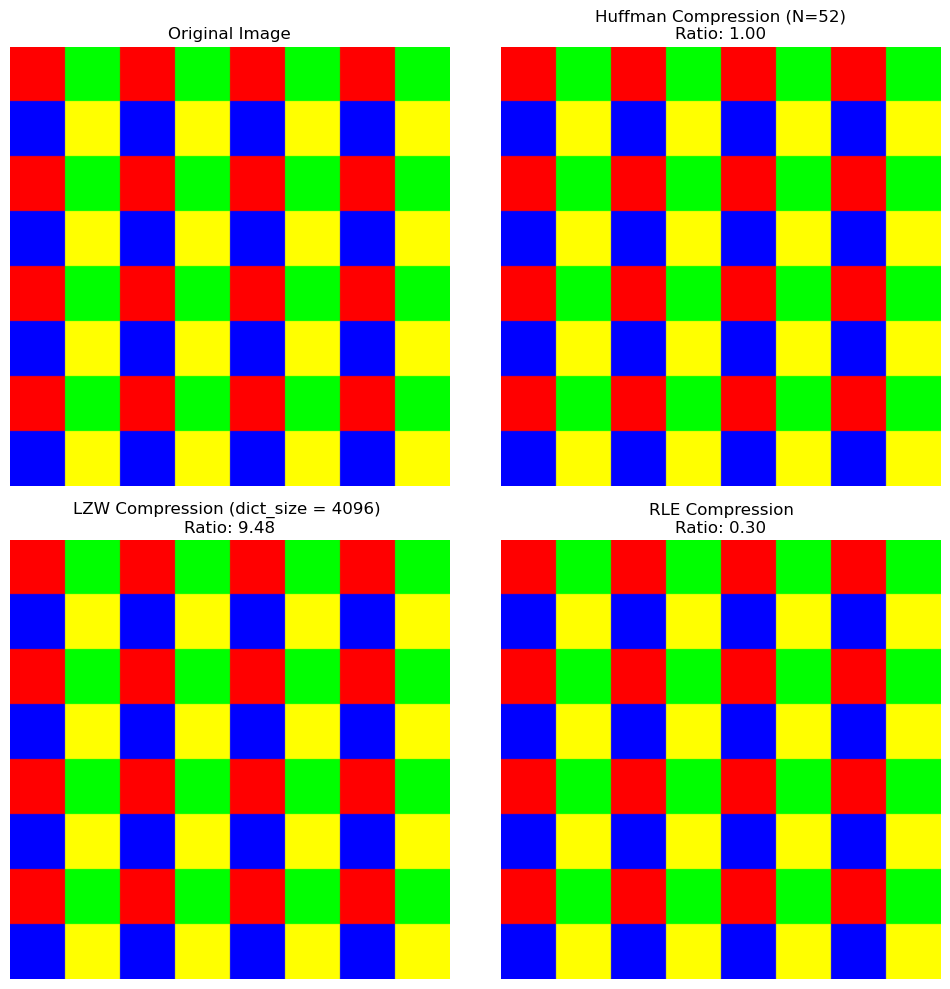

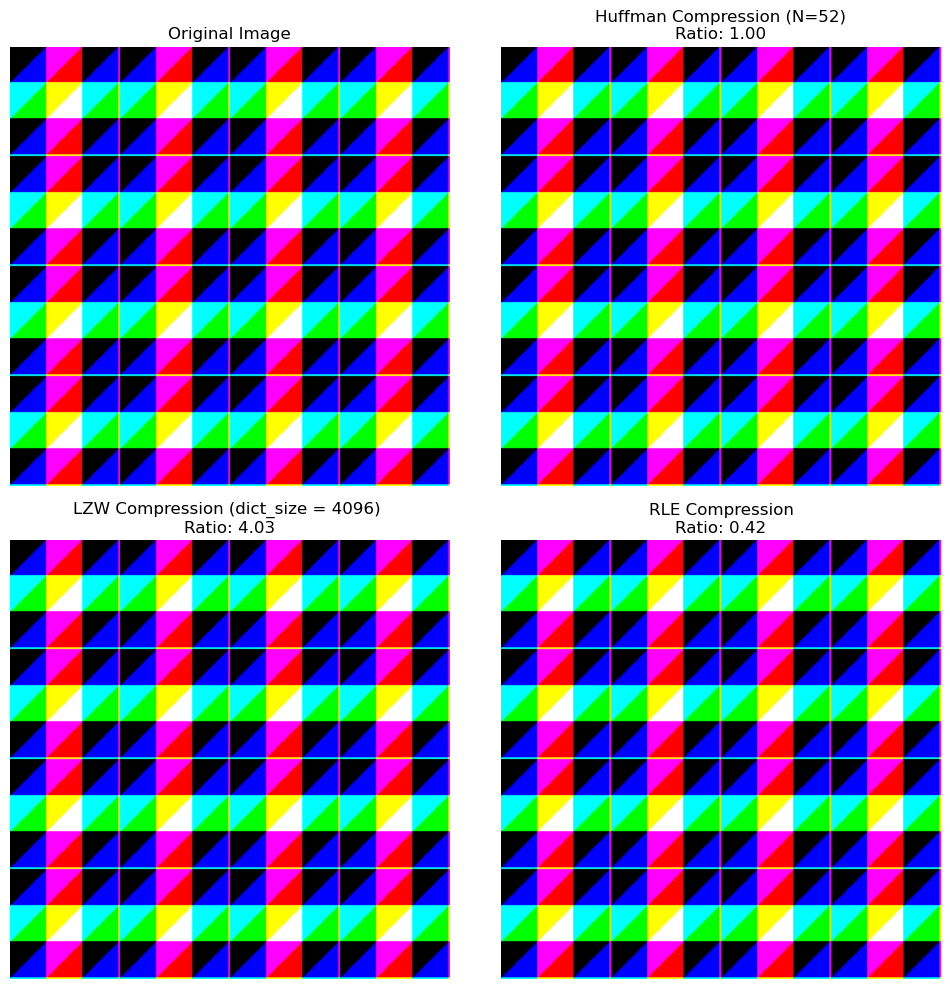

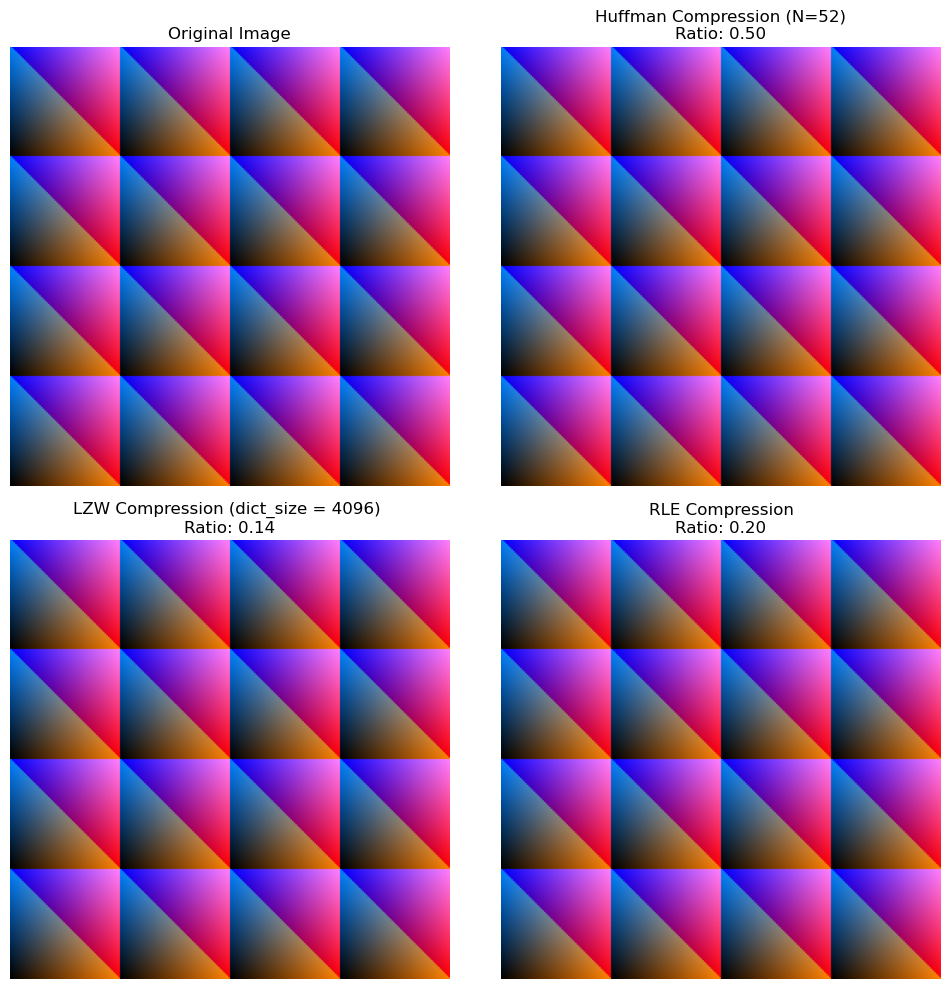

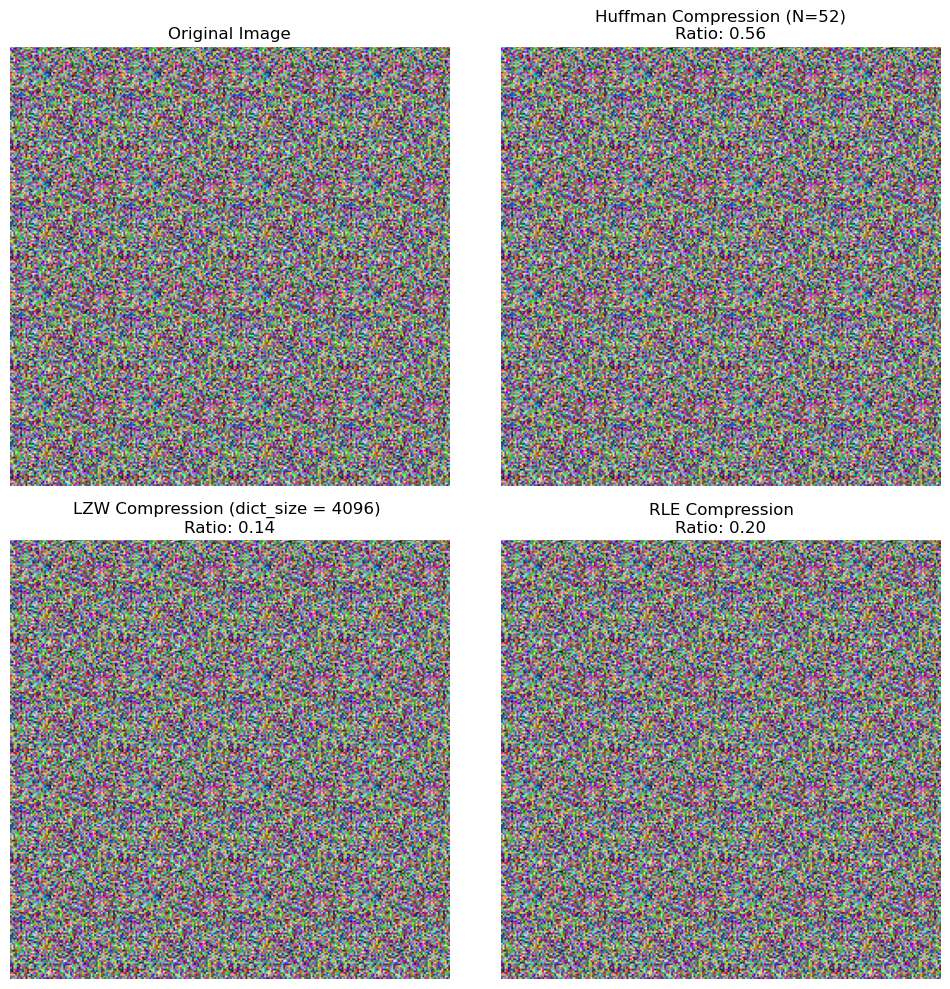

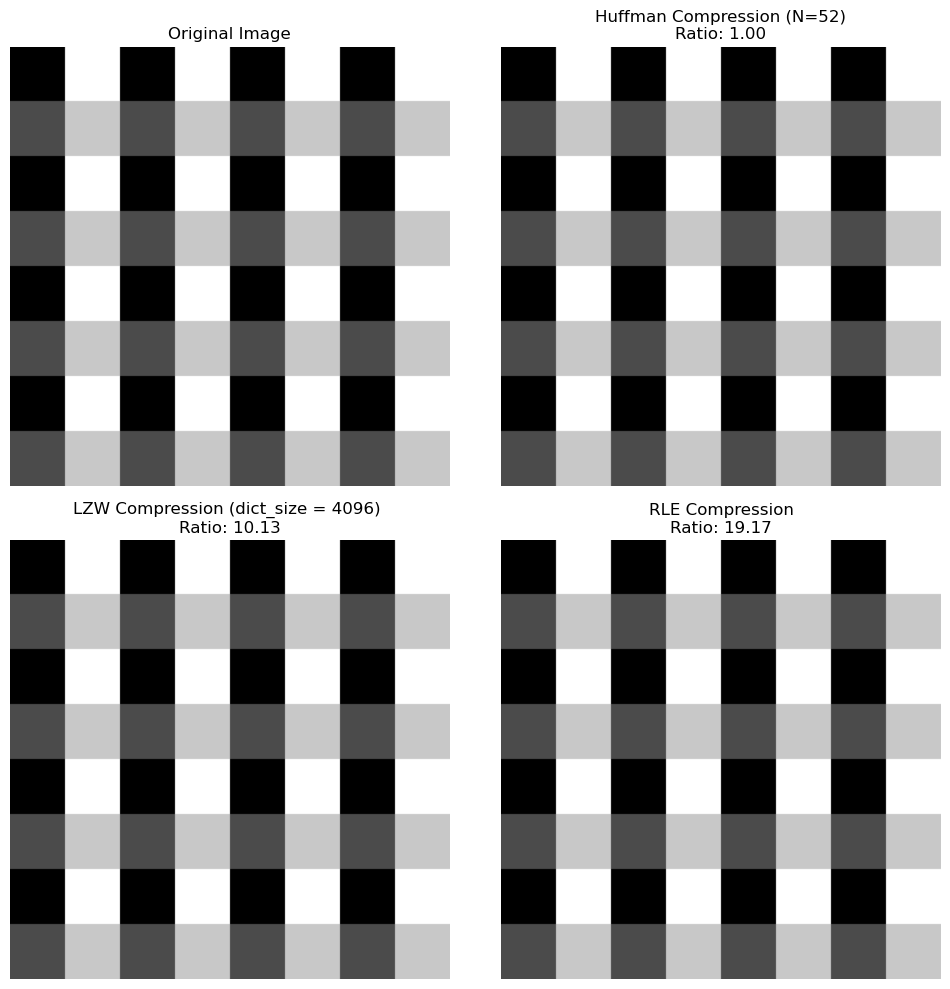

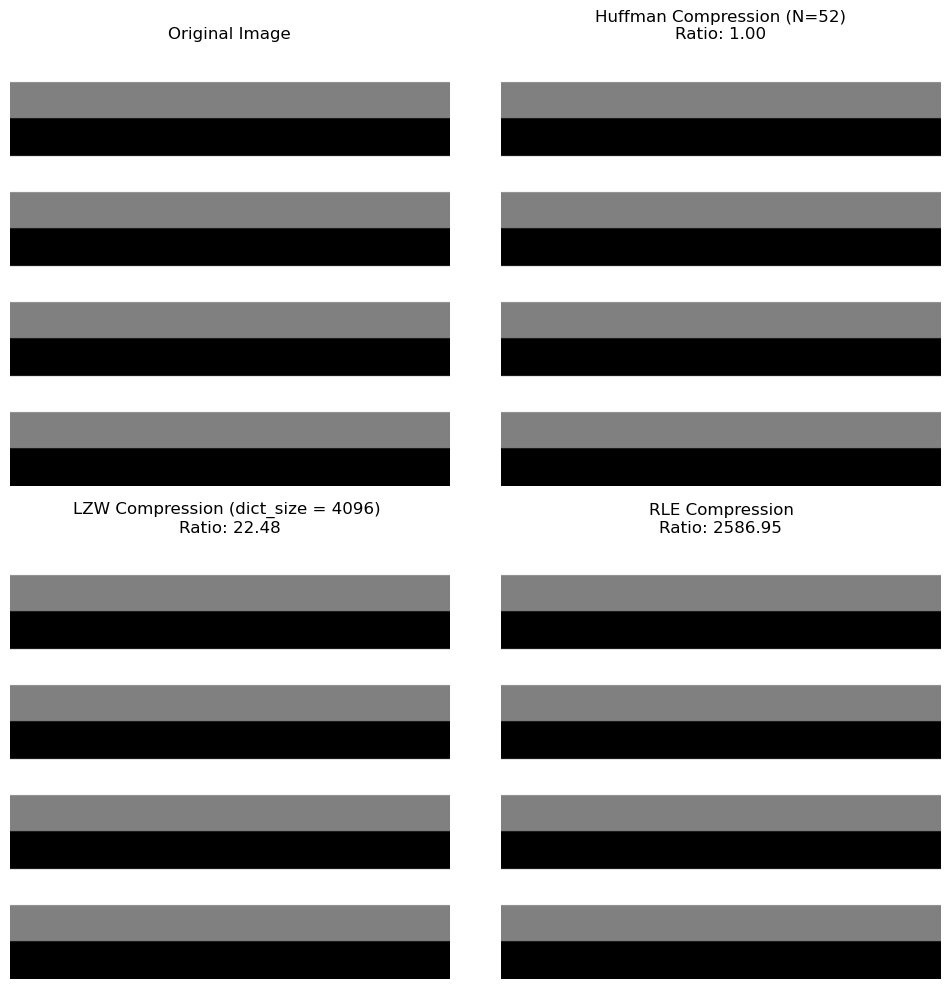

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from comparison import test_all

for ptype in pattern_types:
    img = generate_rgb_pattern(tile_size=64, pattern_type=ptype, repeats=(4, 4))  # 64*4 = 256px

    test_all(img)